# 4. GEOPROCESSAMENTO BÁSICO COM SHAPELY E FIONA

[Abrir no Google Colab](https://colab.research.google.com/github/Alexandrogschafer/Programacao-Geoprocessamento/blob/main/notebooks/capitulo4.ipynb)
<br>

Dentro do ecossistema Python, existem diversas bibliotecas para otimizar o trabalho com dados geoespaciais. Dentre elas, Shapely e Fiona merecem destaque, não apenas por sua simplicidade, mas também pela eficácia com que lidam com tarefas geoespaciais. Quando utilizadas em conjunto, essas bibliotecas proporcionam uma abordagem integrada e robusta para o geoprocessamento básico no Python, tornando a análise e manipulação de dados espaciais mais acessível e eficiente.


## 4.1 A biblioteca Shapely

Shapely é uma biblioteca Python para manipulação e análise de objetos geométricos planares. Baseada na biblioteca GEOS (usada em PostGIS e outros sistemas), ela oferece uma interface amigável para criar, manipular e analisar formas geométricas. As classes básicas são apresentadas na figura 5. 

![Figura 5](images/fig5.png)

Figura 5: Classes para representar geometrias na Shapely


A Shapely destaca-se principalmente por suas capacidades geométricas. Ele facilita a execução de operações como união, interseção, diferença e buffer. Além disso, a biblioteca é essencial para manipular e transformar geometrias, desde a simplificação de linhas e polígonos até a criação de um convex hull em torno de pontos ou a divisão e combinação de diferentes formas geométricas.


### 4.1.1 Criação de Geometrias com Shapely

Conforme apresentamos na figura 5, a Shapely oferece uma série de classes para representar diferentes tipos de geometrias. Vamos explorar como criá-las:

a) Point: Representa uma coordenada única no espaço.

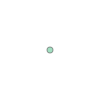

In [1]:
from shapely.geometry import Point
ponto = Point(4.5, 3.2)
ponto

b) Linestring: Representa uma série de pontos conectados para formar uma linha.

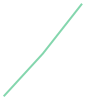

In [2]:
from shapely.geometry import LineString
linha = LineString([(3.3, 3.1), (4.4, 4.3), (5.5, 5.7)])
linha

c) Polygon: Representa uma área fechada. Você deve fornecer ao menos três coordenadas, e o primeiro e o último ponto devem ser os mesmos para fechar o polígono.

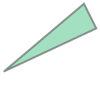

In [3]:
from shapely.geometry import Polygon
poligono = Polygon([(5.1, 3.2), (6.4, 4.3), (6.6, 3.9), (5.1, 3.2)])
poligono

d) Polígono com furo: Refere-se a uma forma geométrica que consiste em um polígono externo maior e um ou mais polígonos internos menores que representam "furos" ou espaços vazios dentro do polígono maior. Estes polígonos internos são completamente contidos dentro do polígono externo e não se sobrepõem uns aos outros. Para criar um polígono com furos usando Shapely, você usaria a classe Polygon. A sintaxe básica é:



Definindo o polígono externo
``` exterior = [(x1, y1), (x2, y2), ...] ```

Definindo um ou mais polígonos internos (furos)
```
interior1 = [(x1, y1), (x2, y2), ...]
interior2 = [(x1, y1), (x2, y2), ...]
```

Criando o polígono 
```
poligono_com_furos = Polygon(exterior, [interior1, interior2])
```

No código acima, exterior define os pontos do polígono externo, enquanto interior1 e interior2 definem os furos dentro do polígono externo. Você pode adicionar quantos "furos" quiser, estendendo a lista de interiores. Exemplo:

Definindo as coordenadas para o anel externo

In [4]:
anel_externo = [(0, 0), (0, 10), (10, 10), (10, 0), (0, 0)]

Definindo as coordenadas para o anel interno

In [5]:
anel_interno = [(2, 2), (2, 8), (8, 8), (8, 4), (2, 2)]

Criando o polígono com anel externo e interno

In [6]:
poligono_com_furo = Polygon(anel_externo, [anel_interno])

Imprimindo o polígono

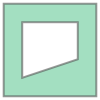

In [7]:
poligono_com_furo

Multipoint: É uma coleção de vários pontos.

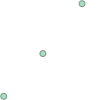

In [8]:
from shapely.geometry import MultiPoint
multiponto = MultiPoint([(3.3, 3.1), (4.4, 4.3), (5.5, 5.7)])
multiponto

Multilinestring: É uma coleção de várias linhas.

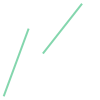

In [9]:
from shapely.geometry import MultiLineString
multilinha = MultiLineString([[(3.3, 3.1), (4, 5)], [(4.4, 4.3), (5.5, 5.7)]])
multilinha

Multipolygon: É uma coleção de vários polígonos.

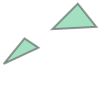

In [10]:
from shapely.geometry import MultiPolygon
poligono1 = Polygon([(4.1, 4.7), (5.0, 5.8), (5.6, 5.4), (4.1, 4.7)])
poligono2 = Polygon([(6.2, 6.2), (7.3, 7.3), (8.1, 6.3), (6.2, 6.2)])
multipoligono = MultiPolygon([poligono1, poligono2])
multipoligono

GeometryCollection: É uma coleção de qualquer combinação de geometrias.

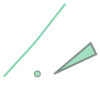

In [11]:
from shapely.geometry import GeometryCollection
colecao = GeometryCollection([ponto, linha, poligono])
colecao

### 4.1.2 Atributos geométrico na Shapely

A Shapely fornece uma variedade de atributos e métodos para interagir e analisar objetos geométricos. Quando falamos sobre "atributos geométricos" no contexto da Shapely, estamos nos referindo às propriedades intrínsecas de uma forma geométrica. Aqui estão alguns dos atributos geométricos mais comuns e úteis disponíveis na Shapely:
<br><br>

geom_type: Retorna o tipo de geometria do objeto, como "Point", "Linestring", "Polygon", etc.

In [12]:
print(ponto.geom_type)  


Point


<br>

area: Retorna a área do objeto geométrico. Este atributo é relevante principalmente para polígonos.

In [13]:
print(poligono.area) 


0.36999999999999966


<br>

length: Para objetos Linestring, retorna o comprimento total da linha. Para objetos Polygon, retorna o comprimento total do perímetro.

In [14]:
print(linha.length)  


3.4083314410864567


<br>

bounds: Retorna uma tupla com as coordenadas (minx, miny, maxx, maxy) que define a caixa delimitadora (bounding box) da geometria.

In [15]:
print(poligono.bounds)  


(5.1, 3.2, 6.6, 4.3)


<br>

is_valid: Verifica se a geometria é válida de acordo com as regras do plano euclidiano. Por exemplo, um polígono que se auto intersecciona não seria válido.

In [16]:
print(poligono.is_valid)  


True


<br>

is_simple: Indica se a geometria não se auto intersecciona. Para a maioria das geometrias, isso é o mesmo que is_valid, mas existem alguns casos raros em que uma geometria pode ser válida, mas não simples.

In [17]:
print(linha.is_simple)  


True


<br>

centroid: Retorna o ponto central (ou "centroide") da geometria.

In [18]:
print(poligono.centroid)  


POINT (6.033333333333334 3.8000000000000003)


<br>

exterior: Para polígonos, retorna o anel externo como um objeto LinearRing.

In [19]:
print(poligono.exterior)  


LINEARRING (5.1 3.2, 6.4 4.3, 6.6 3.9, 5.1 3.2)


<br>

interiors: Para polígonos com furos, retorna uma sequência dos anéis internos.

In [20]:
anel_externo = [(0, 0), (0, 5), (5, 5), (5, 0), (0, 0)]
anel_interno = [(1, 1), (1, 4), (4, 4), (4, 1), (1, 1)]
poli_com_furo = Polygon(shell=anel_externo, holes=[anel_interno])
print(list(poli_com_furo.interiors)) 

[<LINEARRING (1 1, 1 4, 4 4, 4 1, 1 1)>]


<br>

### 4.1.3 Funções geométricas na Shapely

Na Shapely, além dos atributos geométricos, existem várias funções ou métodos que permitem realizar operações geométricas. Essas funções são úteis para manipular, analisar e transformar geometrias. A seguir utilizaremos algumas das funções geométricas mais importantes na Shapely.
<br>

buffer: Cria um buffer ao redor de uma geometria com uma distância especificada.

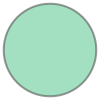

In [21]:
ponto = Point(0, 0)
buffer = ponto.buffer(1)
buffer

<br><br>

union: Retorna a união geométrica entre geometrias.

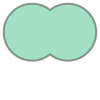

In [22]:
pontoA = Point(0, 0)
pontoB = Point(2.5,0)
bufferA = pontoA.buffer(2)
bufferB = pontoB.buffer(2)
uniao = bufferA.union(bufferB)
uniao

<br>

intersection: Retorna a interseção geométrica entre geometrias.

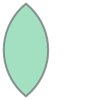

In [23]:
interseccao = bufferA.intersection(bufferB)
interseccao

<br>

difference: Retorna a diferença geométrica entre geometrias (subtrai a segunda geometria da primeira).

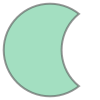

In [24]:
diferencaAB = bufferA.difference(bufferB)
diferencaAB

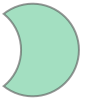

In [25]:
diferencaBA = bufferB.difference(bufferA)
diferencaBA

<br>

symmetric_difference: Retorna as partes de duas geometrias que não são compartilhadas entre si.

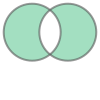

In [26]:
dif_simetrica = bufferA.symmetric_difference(bufferB)
dif_simetrica

<br>

contains: Verifica se uma geometria contém a outra geometria fornecida.

In [27]:
bufferA.contains(Point(1, 1))  

True

<br>

intersects: Verifica se uma geometria intercepta a outra geometria fornecida.

In [28]:
bufferA.intersects(bufferB)  

True

<br>

crosses: Verifica se uma geometria cruza a outra (aplicável principalmente com linhas).

In [29]:
linha1 = LineString([(0, 1), (3, 1)])
linha2 = LineString([(1, 0), (1, 3)])

In [30]:
linha1.crosses(linha2)  

True

<br>

distance: Calcula a distância mínima entre as geometrias.

In [31]:
distancia = pontoB.distance(bufferA)  
distancia

0.5

<br>

envelope: Retorna o menor retângulo delimitador que contém uma geometria.

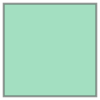

In [32]:
envelope = bufferA.envelope
envelope

![Figura 6](images/fig6.png)

Figura 6: Visualização do buffer e do respectivo envelope
<br><br>

## 4.2 Leitura de arquivos com Fiona

A maneira como os dados espaciais são armazenados é diferente dos arquivos de texto ou binários comuns. Desta maneira, abrir um arquivo geoespacial (como um shapefile, GeoJSON, entre outros) requer uma interpretação especializada das estruturas de dados contidas no arquivo. 

A Fiona fornece a interface e as funcionalidades necessárias para ler e escrever dados geoespaciais em Python. Ele se baseia no conjunto de bibliotecas GDAL/OGR e fornece uma maneira "pythonic" de manipular arquivos de formato vetorial. Uma vez que os dados são lidos com Fiona, as geometrias podem ser facilmente convertidas em objetos Shapely para análise e manipulação geométrica.


### 4.2.1 Leitura de arquivos shapefile com Fiona

O shapefile é um formato de arquivo popular para armazenar informações geográficas, amplamente utilizado em Sistemas de Informações Geográficas (SIG ou GIS, em inglês). Embora existam outros formatos (como GeoJSON, GML, KML) que são mais modernos e flexíveis em muitos aspectos, o formato shapefile pode ser considerado o padrão na área de SIG atualmente.
Além das informações geográficas (coordenadas que definem a geometria), cada objeto em um shapefile pode ter um conjunto de atributos associado. Além disso, um shapefile pode (e geralmente tem) um sistema de referência de coordenadas associado, que define o sistema de projeção. 

É importante ressaltar que o shapefile é, na realidade, um conjunto de arquivos que trabalham juntos para representar e armazenar informações geográficas e seus atributos. Existem três arquivos principais, essenciais para que o shapefile funcione corretamente, e vários outros arquivos auxiliares que podem acompanhar um shapefile dependendo das características e necessidades do conjunto de dados. Nos quadros 8 e 9 apresenta-se os principais arquivos que podem constituir um shapefile.
<br><br>

Quadro 8: Arquivos obrigatórios

| Arquivo | Descrição                                                                                                                     |
|---------|-------------------------------------------------------------------------------------------------------------------------------|
| shp     | Contém a geometria dos objetos, por exemplo, pontos, linhas ou polígonos.                                                      |
| shx     | É o índice da geometria. Ele fornece um índice para os objetos no arquivo .shp, permitindo um acesso mais rápido a eles.     |
| dbf     | Contém os atributos para cada objeto em uma tabela. Cada linha da tabela corresponde a um objeto no arquivo .shp e cada coluna é um atributo desse objeto. |
<br><br>

Quadro 9: Arquivos auxiliares

| Arquivo | Descrição                                                                                                                                                                                                                                      |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| prj      | Contém informações sobre a projeção e o sistema de coordenadas em que os dados estão definidos.                                                                                                                                               |
| sbn      | São arquivos de índice espacial. Eles podem ser usados por alguns sistemas SIG para renderizar e consultar dados mais rapidamente.                                                                                                           |
| sbx      | São arquivos de índice espacial. Eles podem ser usados por alguns sistemas SIG para renderizar e consultar dados mais rapidamente.                                                                                                           |
| qix      | É um arquivo de índice espacial opcional criado por algumas ferramentas, como o QGIS, para acelerar operações espaciais.                                                                                                                      |
| lyr      | É um arquivo utilizado pelo ArcGIS para armazenar informações sobre a simbologia e a visualização do shapefile.                                                                                                                                |
| cpg      | Contém informações sobre a codificação de caracteres para o arquivo .dbf, o que pode ser importante para a exibição correta de caracteres especiais ou não ASCII.                                                                             |
| atx      | É um arquivo de índice criado pelo ArcGIS para campos específicos na tabela de atributos, acelerando determinadas operações.                                                                                                                    |
<br><br>


Existem outros arquivos que podem, ocasionalmente, estar associados a um shapefile, especialmente quando se trabalha com softwares específicos que criam arquivos de índice ou metadados adicionais. No entanto, os listados acima são os mais comuns. Vale lembrar que para transferir ou mover um shapefile, é importante manter pelo menos os três arquivos principais juntos (.shp, .shx e .dbf) para garantir a integridade dos dados.

O código a seguir é um exemplo de como ler um arquivo shapefile:

``` 
import fiona
# Abre o arquivo shapefile
with fiona.open('caminho_para_seu_arquivo.shp', 'r') as registro:
    # Imprime o tipo de geometria (Ex.: 'Point', 'LineString', 'Polygon')
    print(registro.schema['geometry'])
    # Itera sobre cada recurso no shapefile

    for entidade in registro:
        # 'entidade' é um dicionário com os atributos e a geometria
        geom = entidade['geometry']  # geometria
        props = entidade['properties']  # atributos
        print(geom)
        print(props)
```

Vamos entender cada parte do código:
<br><br>

``` import fiona ```

A primeira linha importa a biblioteca fiona.
<br><br>

``` with fiona.open('caminho_para_seu_arquivo.shp', 'r') as registro: ```

A função fiona.open é usada para abrir um arquivo shapefile. O argumento 'r' indica que o arquivo está sendo aberto no modo de leitura (read). A instrução with é usada aqui para garantir que o arquivo seja fechado corretamente após sua utilização, independentemente de ocorrerem erros durante a execução do código.
<br><br>

```print(registro.schema['geometry'])```

Imprime o tipo de geometria do shapefile, que pode ser, por exemplo, 'Point', 'Linestring' ou 'Polygon'. registro.schema é um dicionário que descreve os atributos e a geometria do shapefile.
<br><br>

``` for entidade in registro: ```

Este é um loop que itera sobre cada registro no shapefile. O objetivo dessa iteração é processar cada entidade individualmente.
<br><br>

```geom = entidade['geometry']  # geometria```

Aqui, a geometria de cada registro é extraída. A geometria pode ser um ponto, uma linha, um polígono, etc.
<br><br>

```props = entidade['properties']  # atributos```

Aqui, os atributos associados a cada recurso são extraídos. Os atributos são os dados associados a cada geometria, como nomes, valores, categorias, etc..
<br><br>

```
print(geom)
print(props)
```

Esse código imprime a geometria e os atributos de cada registro.
<br><br>

Quando você usa a biblioteca fiona para abrir e ler um shapefile, vários processos ocorrem internamente. Aqui está uma visão geral do que acontece:

Abertura do Arquivo: Quando você chama fiona.open(), a biblioteca primeiramente localiza e abre o arquivo shapefile para leitura;
Leitura dos Metadados: Uma vez que o arquivo é aberto, fiona começa lendo os metadados associados ao shapefile. Isso inclui informações sobre o sistema de coordenadas, o tipo de geometria (pontos, linhas, polígonos, etc.) e a estrutura do arquivo de atributos (campos, tipos de dados, etc.);

Interface Iterável: A biblioteca fornece uma interface iterável sobre os registros no shapefile. Cada registro contém uma geometria e um conjunto associado de atributos;

Acesso Direto à Geometria e Atributos: Ao iterar sobre os registros, você pode acessar diretamente as geometrias e os atributos de cada registro. Fiona retorna geometrias no formato GeoJSON e permite que você interaja com os atributos como se estivesse trabalhando com um dicionário em Python;

Conversão de Geometrias: Embora as geometrias retornem no formato GeoJSON, elas são compatíveis com a biblioteca shapely. Isto significa que você pode convertê-las em objetos shapely para análise e manipulação geométrica;

Fechamento Automático: Se você usar fiona dentro de um bloco with (como é recomendado), o arquivo será automaticamente fechado quando o bloco for concluído. Isso garante que os recursos do sistema sejam liberados e que não haja bloqueios no arquivo;

Manipulação de Erros: Durante todo o processo, fiona tem mecanismos para lidar com erros. Se houver algum problema com o arquivo (por exemplo, se estiver corrompido ou faltando componentes), fiona geralmente lançará um erro explicativo.
<br><br>

*Obtendo metadados do arquivo*

Os metadados de um shapefile referem-se a informações sobre o próprio shapefile, como o sistema de coordenadas em que os dados estão projetados, o tipo de geometria (pontos, linhas ou polígonos) e outras informações que descrevem o conteúdo, qualidade, condição, e outras características do arquivo. Em muitos casos, os metadados são vitais para a correta interpretação e uso dos dados no shapefile. Sem metadados adequados, um usuário pode interpretar mal os dados, levando a decisões ou análises incorretas.

Os metadados de um arquivo shapefile utilizando Fiona podem ser obtidos utilizando o seguinte código:

```
import fiona
with fiona.open('caminho_para_seu_arquivo.shp', 'r') as registro:
    # Sistema de coordenadas
    crs = registro.crs
    print('CRS:', crs)

    # Limites do conjunto de dados
    bounds = registro.bounds
    print('Ext_espacial:', bounds)

    # Total de recursos no arquivo
    total = len(registro)
    print('Total de registros:', total)
```

Nesse código, fiona.open() é usado para abrir e ler o arquivo shapefile; registro.crs fornece o Sistema de Referência de Coordenadas (CRS) do shapefile; registro.bounds retorna uma tupla com os limites do conjunto de dados: (minx, miny, maxx, maxy), onde minx e miny são as coordenadas mínimas x e y, e maxx e maxy são as coordenadas máximas x e y; len(registro) retorna o número total de recursos no arquivo shapefile, ou seja, a quantidade de objetos que ele contém.

Exemplo: Vamos abrir o shapefile “BR_UF.shp”, constituído por polígonos referentes a cada estado brasileiro (figura 7) e pelos atributos que constam na figura 8.

![Figura 7](images/fig7.png)

Figura 7: Visualização do arquivo shapefile BR_UF.
<br><br>

![Figura 8](images/fig8.png)

Figura 8: Visualização parcial da tabela de atributos de BR_UF.
<br><br>

Vamos utilizar o script abaixo para abrir o shapefile, ler as geometrias do tipo Polygon e imprimir os atributos CD_UF, NM_UF e SIGLA_UF.

In [33]:
import os
home_dir = os.path.expanduser("~")
shp_file_path = os.path.join(home_dir, 'geopythonbook/files/f4/BR_UF.shp')

import fiona
with fiona.open(shp_file_path, 'r') as registro:
    print(registro.schema['geometry'])

    for entidade in registro:
        geom = entidade['geometry']  
        props = entidade['properties'] 
        
        # Extrai os atributos desejados
        id_estado = props['CD_UF']
        nome = props['NM_UF']
        sigla = props['SIGLA_UF']
            
        # Imprime os atributos
        print(f'ID: {id_estado}, Nome: {nome}, Sigla: {sigla}')


Polygon
ID: 12, Nome: Acre, Sigla: AC
ID: 13, Nome: Amazonas, Sigla: AM
ID: 15, Nome: Pará, Sigla: PA
ID: 16, Nome: Amapá, Sigla: AP
ID: 17, Nome: Tocantins, Sigla: TO
ID: 21, Nome: Maranhão, Sigla: MA
ID: 22, Nome: Piauí, Sigla: PI
ID: 23, Nome: Ceará, Sigla: CE
ID: 24, Nome: Rio Grande do Norte, Sigla: RN
ID: 25, Nome: Paraíba, Sigla: PB
ID: 26, Nome: Pernambuco, Sigla: PE
ID: 27, Nome: Alagoas, Sigla: AL
ID: 28, Nome: Sergipe, Sigla: SE
ID: 29, Nome: Bahia, Sigla: BA
ID: 31, Nome: Minas Gerais, Sigla: MG
ID: 32, Nome: Espírito Santo, Sigla: ES


ID: 33, Nome: Rio de Janeiro, Sigla: RJ
ID: 35, Nome: São Paulo, Sigla: SP
ID: 41, Nome: Paraná, Sigla: PR
ID: 42, Nome: Santa Catarina, Sigla: SC
ID: 43, Nome: Rio Grande do Sul, Sigla: RS
ID: 50, Nome: Mato Grosso do Sul, Sigla: MS
ID: 51, Nome: Mato Grosso, Sigla: MT
ID: 52, Nome: Goiás, Sigla: GO
ID: 53, Nome: Distrito Federal, Sigla: DF
ID: 11, Nome: Rondônia, Sigla: RO
ID: 14, Nome: Roraima, Sigla: RR


<br><br>

Aplicando o script de consulta de metadados, obtemos:


O EPSG 4326 é um código de sistema de referência espacial (SRS) que se refere ao sistema WGS 84 (World Geodetic System 1984). EPSG significa "European Petroleum Survey Group". Originalmente era um grupo de trabalho dedicado à aplicação da geodésia e da cartografia na indústria de petróleo e gás na Europa. 

O grupo criou e mantém uma base de dados com códigos para sistemas de referência espacial, transformações de coordenadas, unidades e métodos relacionados. Este banco de dados é amplamente utilizado em software GIS e outras aplicações geoespaciais. “4326” é o código específico no banco de dados EPSG que se refere ao WGS 84 com coordenadas em latitude e longitude (em graus decimais). 



## 4.3 Manipulando e escrevendo com Shapely e Fiona

Escrever dados espaciais usando as bibliotecas Shapely e Fiona é uma tarefa comum em aplicações de geoprocessamento com Python. A Shapely é utilizada para manipular e analisar dados geométricos, enquanto a Fiona é usada para ler e escrever dados geoespaciais. Vamos criar um exemplo simples para demonstrar como escrever um shapefile contendo pontos usando Shapely e Fiona:

Exemplo 1: Criar um shapefile contendo um único ponto (5,5) com as propriedades 'ID' e 'NOME'. Você pode estender o exemplo adicionando mais pontos ou outras geometrias e propriedades, conforme sua necessidade.

In [34]:
from shapely.geometry import mapping

# Define a estrutura do shapefile
esquema = {
    'geometry': 'Point',
    'properties': {'id': 'int', 'nome': 'str'},
}

# Caminho e nome para o novo shapefile
shapefile_saida = 'files_out/pontos_saida.shp'

# Cria um novo shapefile
with fiona.open(shapefile_saida, 'w', 'ESRI Shapefile', esquema) as c:

    # Exemplo de dados: um ponto com coordenadas (5,5) e algumas propriedades
    ponto = Point(5, 5)
    propriedades = {'id': 1, 'nome': 'Ponto de exemplo'}
    
    # Escreve o ponto no shapefile
    c.write({
        'geometry': mapping(ponto),
        'properties': propriedades
    })

print(f'Shapefile {shapefile_saida} criado com sucesso!')

Shapefile files_out/pontos_saida.shp criado com sucesso!


<br><br>

Vamos detalhar o código:
<br><br>

```import fiona ``` 

Importa a biblioteca Fiona, que é usada para a leitura e escrita de arquivos geoespaciais.
<br><br>

```from shapely.geometry import mapping ```

Importa a função mapping é usada para converter geometrias Shapely em um formato que Fiona possa entender.
<br><br>

```
esquema = {
    'geometry': 'Point',
    'properties': {'id': 'int', 'name': 'str'},
}
```

Um dicionário chamado esquema é definido para especificar a estrutura do shapefile. Indica que o shapefile conterá geometrias do tipo ponto ('geometry': 'Point') e terá duas propriedades/atributos: id (um número inteiro) e name (uma string).
<br><br>

``` shapefile_saida = 'pontos_saida.shp' ```

Especifica o nome e o caminho do novo shapefile que será criado: shapefile_saida.
<br><br>

``` with fiona.open(shapefile_saida, 'w', 'ESRI Shapefile', esquema) as c:```

Aqui, o comando fiona.open é usado com o argumento 'w' (para escrita) para criar um novo shapefile. Também especifica o formato do arquivo ('ESRI Shapefile') e o esquema previamente definido.
<br><br>

```
ponto = Point(5, 5)
    propriedades = {'ID': 1, 'NOME': 'Ponto de exemplo'}
```

Um objeto de ponto é criado usando a classe Point da biblioteca Shapely, e as propriedades associadas a esse ponto são armazenadas no dicionário “propriedades”.
<br><br>

```
   c.write({
        'geometry': mapping(ponto),
        'properties': propriedades
    })
```

O ponto e suas propriedades são escritos no shapefile. A função mapping é usada para converter o objeto de ponto em um formato que Fiona possa entender e escrever no arquivo.
<br><br>

``` print(f'Shapefile {shapefile_saida} criado com sucesso!') ```

Uma mensagem é impressa para confirmar que o shapefile foi criado com sucesso. 
<br><br>

Você pode visualizar os arquivos criados na aba files, na lateral esquerda do ambiente do Google Colab.

Lembre-se de que ao trabalhar com shapefiles, além do arquivo .shp, outros arquivos (como .shx e .dbf) também são gerados. Se você decidir mover ou compartilhar seu shapefile, certifique-se de incluir esses arquivos auxiliares.
<br><br>


Exemplo 2: Criar um shapefile com as capitais do Brasil, com geometrias do tipo ponto.

In [35]:
from fiona.crs import from_epsg


esquema = {
    'geometry': 'Point',
    'properties': {'capital': 'str', 'estado': 'str'},
}

Nesse código, importamos as bibliotecas e definimos a estrutura do arquivo shapefile. O campo geometry define que o arquivo conterá pontos (Point). O campo properties especifica que cada ponto terá dois atributos associados: capital (o nome da capital) e estado (o nome do estado), ambos do tipo string (str).
<br><br>

In [36]:
capitais = {
    'Brasília': ('Distrito Federal', (-47.8825, -15.7934)),
    'Rio Branco': ('Acre', (-67.8270, -9.97499)),
    'Maceió': ('Alagoas', (-35.7353, -9.66599)),
    'Manaus': ('Amazonas', (-60.0253, -3.11333)),
    'Macapá': ('Amapá', (-51.0705, 0.039452)),
    'Salvador': ('Bahia', (-38.5014, -12.9714)),
    'Fortaleza': ('Ceará', (-38.5423, -3.71722)),
    'Vitória': ('Espírito Santo', (-40.2976, -20.3195)),
    'Goiânia': ('Goiás', (-49.2539, -16.6869)),
    'São Luís': ('Maranhão', (-44.3028, -2.52996)),
    'Cuiabá': ('Mato Grosso', (-56.0974, -15.6014)),
    'Campo Grande': ('Mato Grosso do Sul', (-54.6156, -20.4428)),
    'Belo Horizonte': ('Minas Gerais', (-43.9378, -19.9208)),
    'Belém': ('Pará', (-48.4874, -1.4554)),
    'João Pessoa': ('Paraíba', (-34.8761, -7.11509)),
    'Curitiba': ('Paraná', (-49.2713, -25.4296)),
    'Recife': ('Pernambuco', (-34.8813, -8.05428)),
    'Teresina': ('Piauí', (-42.8056, -5.09194)),
    'Rio de Janeiro': ('Rio de Janeiro', (-43.1965, -22.9083)),
    'Natal': ('Rio Grande do Norte', (-35.2091, -5.79448)),
    'Porto Alegre': ('Rio Grande do Sul', (-51.2167, -30.0277)),
    'Porto Velho': ('Rondônia', (-63.9004, -8.76077)),
    'Boa Vista': ('Roraima', (-60.6733, 2.81972)),
    'Florianópolis': ('Santa Catarina', (-48.5012, -27.5954)),
    'São Paulo': ('São Paulo', (-46.6395, -23.5475)),
    'Aracaju': ('Sergipe', (-37.0763, -10.9873)),
    'Palmas': ('Tocantins', (-48.3344, -10.2391))
}

Com este código, criamos um dicionário chamado “capitais”. As chaves do dicionário são os nomes das capitais e os valores são tuplas que contêm o nome do estado e as coordenadas (longitude e latitude) da respectiva capital.
<br><br>

In [37]:
# Neste trecho, o código inicia o processo de criação do arquivo shapefile usando a biblioteca fiona. O arquivo será salvo como 'capitais_br.shp' na pasta files_out. O CRS (Sistema de Referência de Coordenadas) utilizado é o EPSG 4326.

with fiona.open('files_out/capitais_br.shp', 'w', driver='ESRI Shapefile', crs=from_epsg(4326), schema=esquema) as layer:
    for capital, (estado, coords) in capitais.items():
        ponto = Point(coords)
        propriedades = {
            'geometry': {
                'type': 'Point',
                'coordinates': coords,
            },
            'properties': {
                'capital': capital,
                'estado': estado,
            },
        }
        layer.write(propriedades)

Nesse código, iteramos sobre o dicionário capitais. Para cada capital, ele cria um objeto Point com as coordenadas. Em seguida, ele cria um dicionário propriedades que contém as informações geométricas e os atributos associados. Esse dicionário é então escrito (adicionado) no arquivo shapefile usando o método write.
<br><br>

In [38]:
print('Shapefile criado com sucesso!')

Shapefile criado com sucesso!


Por fim, o código imprime uma mensagem indicando que o arquivo shapefile foi criado com sucesso. 

Na figura 9 podemos visualizar os pontos referentes as capitais provenientes do arquivo shapefile criado.

![Figura 9](images/fig9.png)

Figura 9: Visualização dos pontos referentes às capitais dos estados brasileiros.
<br><br>

Exemplo 3: Escrever um arquivo em formato GeoJSON

O GeoJSON é um formato de intercâmbio de dados geoespaciais, baseado no JSON (JavaScript Object Notation). Foi desenvolvido para representar objetos geográficos simples, juntamente com seus atributos não espaciais. Devido à simplicidade e à crescente adoção de tecnologias baseadas em web para aplicações geoespaciais, o GeoJSON vem se tornando um dos formatos padrão para transmissão de dados geoespaciais na web.

O GeoJSON suporta vários tipos de geometria, incluindo Point (ponto), Linestring (linha), Polygon (polígono), Multipoint, Multilinestring, e Multipolygon. Além disso, ele suporta GeometryCollection, que, como vimos, é uma coleção de geometrias. Além da geometria, cada objeto GeoJSON pode ter atributos associados. Estes são armazenados em um objeto chamado propriedades. As coordenadas em GeoJSON são sempre em longitude e latitude (e opcionalmente altitude), e são representadas no formato decimal.

Para criar um arquivo GeoJSON na fiona, é necessário alterar o argumento driver para "GeoJSON" quando você abrir o arquivo para escrita com fiona.open(). Esse argumento especifica o formato desejado, que neste caso é GeoJSON.
with fiona.open(arquivo_saida, 'w', driver='GeoJSON', schema=esquema) as c:

Vamos criar um arquivo GeoJSON contendo uma linha definida a partir de três pontos.

In [39]:
# Define a estrutura do GeoJSON
esquema = {
    'geometry': 'LineString',
    'properties': {'id': 'int', 'descricao': 'str'},
}

# Caminho e nome para o novo GeoJSON
arquivo_saida = 'files_out/linhas_saida.geojson'

# Cria um novo arquivo GeoJSON

with fiona.open(arquivo_saida, 'w', driver='GeoJSON', schema=esquema) as c:
    
    # Exemplo de dados: uma linha com coordenadas [(0,0), (5,5), (10,10)] e algumas propriedades
    linha = LineString([(0, 0), (5, 5), (10, 10)])
    propriedades = {'id': 1, 'descricao': 'Linha Exemplo'}
    
    # Escreve a linha no GeoJSON
    c.write({
        'geometry': mapping(linha),
        'properties': propriedades,
    })

print(f'Arquivo GeoJSON {arquivo_saida} criado com sucesso!')

Arquivo GeoJSON files_out/linhas_saida.geojson criado com sucesso!


<br><br>


Exemplo 4: Escrever um arquivo shapefile com geometrias do tipo polígono

Para escrever um shapefile contendo polígonos, utilizaremos a mesma sintaxe dos exemplos anteriores, usando Shapely para a criação das geometrias e Fiona para a escrita dos dados em formato shapefile:

In [40]:
# Define a estrutura do shapefile
esquema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int', 'descricao': 'str'},
}

# Caminho e nome para o novo shapefile
arquivo_saida = 'files_out/poligonos_saida.shp'

# Cria um novo shapefile
with fiona.open(arquivo_saida, 'w', 'ESRI Shapefile', esquema) as c:
    
    # Exemplo de dados: um polígono com coordenadas [(0,0), (5,5), (10,0), (0,0)] 
    #e algumas propriedades
    poligono = Polygon([(0, 0), (5, 5), (10, 0), (0, 0)])
    propriedades = {'id': 1, 'descricao': 'Polígono Exemplo'}
    
    # Escreve o polígono no shapefile
    c.write({
        'geometry': mapping(poligono),
        'properties': propriedades,
    })

print(f'Shapefile {arquivo_saida} criado com sucesso!')

Shapefile files_out/poligonos_saida.shp criado com sucesso!


<br><br>

Você pode visualizar os arquivos criados na aba files, na lateral esquerda do ambiente do Google Colab.


É possível estender o exemplo acima para adicionar mais polígonos ou outras propriedades conforme a necessidade. Novamente, lembre-se de que shapefiles são compostos por múltiplos arquivos (.shp, .shx, .dbf, entre outros). Ao mover ou compartilhar seu shapefile, não se esqueça de incluir todos os arquivos auxiliares.